<h1>Feature Engineering</h1>


In [700]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.collections import LineCollection

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


----
<p>I will generate 150 points for the training set. Points on or below the axis will be blue. Points above the axis will be red.</p>

----

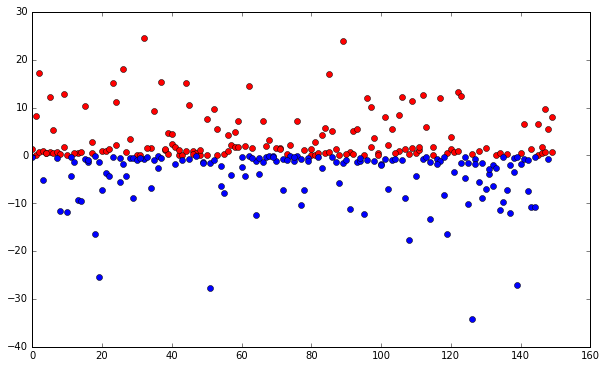

In [701]:
mean   = [0, 0]
cov    = [[1, 0], [0, 100]]
points = np.random.multivariate_normal(mean, cov, 150)
points = np.round(points, decimals = 2)

pos_points = points.copy()
neg_points = points.copy()

pos_points[pos_points <= 0] = np.nan
neg_points[neg_points >  0] = np.nan

plt.plot(pos_points, 'ro', color = 'r')
plt.plot(neg_points, 'ro', color = 'b',)

----
<p>Having visually generated the concept, I will now provide labels for all of the training points.</p>
<p>This means that everything above 0.5 wil have the label <code>0</code> and everything equal to or below 0.5, the label <code>1</code>.</p>
<p>I will create a dataframe which has three columns. Column one and two will be the (x,y) coordinates, and the third column will be the label.</p>

----

In [702]:
pointsDF = pd.DataFrame(points)

scaled = MinMaxScaler(feature_range=(0,1))
pointsDF = scaled.fit_transform(pointsDF)

pointsDF = pd.DataFrame(pointsDF)

In [703]:
pointsDF['label'] = np.where((pointsDF[1] <= 0.5), 2, 1)

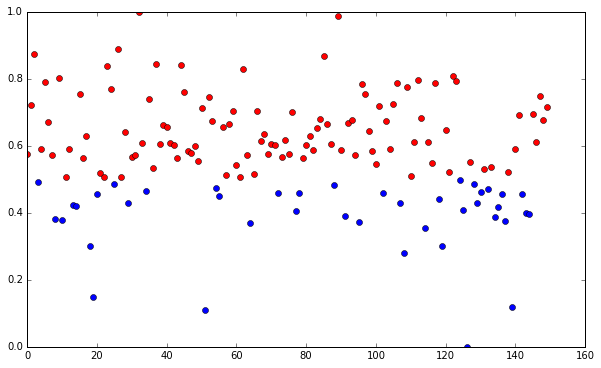

In [704]:
zeros = pointsDF[(pointsDF.label==1)]
ones  = pointsDF[(pointsDF.label==2)]


plt.plot(zeros[1], 'ro', color='r' )
plt.plot(ones[1],  'ro', color='b' )

----

<h3>I have simplified the problem.</h3>
<p>Now there is just one variable, apart from the <code>index</code> and the <code>label</code>. So for instance <code>point 120</code> or <code>point 3</code> or <code>point 43</code> and its correponding value, which takes on a number between <code>0</code> and <code>1</code>. If it is below <code>0.5</code> it takes on the <code>label 1</code> and if it is above <code>0.5</code> it takes on the <code>value 0</code>.</p>

----


<h3>Split into train and test sets, with seperate refs for each column</h3>

In [705]:
trainX = pointsDF.iloc[0:100,1]
#testX  = pointsDF.iloc[101:, 1]

trainY = pointsDF.iloc[0:100,2]
#testY  = pointsDF.iloc[101:, 2]

print(len(trainX), len(trainY))

100 100


In [706]:
trainX = np.asarray(trainX)
trainY = np.asarray(trainY)

In [707]:
print(trainX)

[ 0.57466372  0.72228844  0.87348885  0.49259322  0.59169079  0.79039673
  0.67035587  0.57262047  0.38293887  0.80146433  0.379874    0.50808786
  0.59100971  0.42380385  0.41920654  0.75600204  0.56342585  0.62966116
  0.30086838  0.14898689  0.45751745  0.51796356  0.50638515  0.83926443
  0.77149668  0.48527158  0.8883024   0.50757705  0.64158011  0.42908224
  0.56649072  0.57210965  1.          0.60769624  0.4665418   0.73982632
  0.53516091  0.84420228  0.60429082  0.66150179  0.65690448  0.60956922
  0.60173676  0.56410693  0.8406266   0.76025881  0.58505023  0.57755832
  0.60071514  0.55559339  0.71207219  0.10914354  0.74595607  0.67461263
  0.47369317  0.44934446  0.65571258  0.51234463  0.66524774  0.7038992
  0.54180146  0.50791759  0.82921846  0.57159884  0.37067938  0.51592031
  0.7038992   0.61365571  0.63647199  0.57483399  0.60650434  0.60360974
  0.45887962  0.5654691   0.6172314   0.57551507  0.7027073   0.40439298
  0.45853908  0.56257449  0.60292866  0.62863954  0.

In [708]:
print(trainY)

[1 1 1 2 1 1 1 1 2 1 2 1 1 2 2 1 1 1 2 2 2 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1
 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1]


<h3>Time to build the net...</h3>

In [709]:
import math
import tensorflow as tf

----

<h3>Below</h3>

<p>is a simpler implementation of a classification algorithm</p>

----

In [710]:
learning_rate   = 0.001
training_epochs = 20
batch_size      = 100
display_step    = 1

n_hidden_1 = 256
n_hidden_2 = 256
n_input    = 1
n_classes  = 1

X = tf.placeholder("float32")
Y = tf.placeholder("float32")

#trainX = tf.convert_to_tensor(trainX)
#trainY = tf.convert_to_tensor(trainY)

In [711]:
def multilayer_perceptron(X, weights, biases):
    layer_1 = tf.add(tf.matmul( X, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b1'])
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [712]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

pred      = multilayer_perceptron(X, weights, biases)
cost      = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

init      = tf.initialize_all_variables()

In [713]:
with tf.Session() as sess:
    
    sess.run(init)
        
    for epoch in range(training_epochs):
        #avg_cost = 0.
        
        for (xs, ys) in zip(trainX, trainY):
            print(xs, ys)
            print(X, Y)
            print(optimizer)
            sess.run(optimizer, feed_dict={X:xs, Y:ys})
            
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={xs: trainX, ys: trainY})
    
    print("op finished")
    training_cost = sess.run(cost, feed_dict={x:trainX, y:trainY})
    print(training_cost)

0.574663715307 1
Tensor("Placeholder_147:0", dtype=float32) Tensor("Placeholder_148:0", dtype=float32)
name: "Adam_35"
op: "NoOp"
input: "^Adam_35/update_Variable_445/ApplyAdam"
input: "^Adam_35/update_Variable_446/ApplyAdam"
input: "^Adam_35/update_Variable_447/ApplyAdam"
input: "^Adam_35/update_Variable_448/ApplyAdam"
input: "^Adam_35/update_Variable_450/ApplyAdam"
input: "^Adam_35/Assign"
input: "^Adam_35/Assign_1"



InvalidArgumentError: In[0] is not a matrix
	 [[Node: MatMul_146 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_Placeholder_147_0, Variable_445/read)]]

Caused by op 'MatMul_146', defined at:
  File "//anaconda/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "//anaconda/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "//anaconda/lib/python3.5/site-packages/traitlets/config/application.py", line 589, in launch_instance
    app.start()
  File "//anaconda/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "//anaconda/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "//anaconda/lib/python3.5/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "//anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "//anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "//anaconda/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "//anaconda/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "//anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "//anaconda/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "//anaconda/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-712-bd3cd6ede2f9>", line 13, in <module>
    pred      = multilayer_perceptron(X, weights, biases)
  File "<ipython-input-711-1143ee4f840e>", line 2, in multilayer_perceptron
    layer_1 = tf.add(tf.matmul( X, weights['h1']), biases['b1'])
  File "//anaconda/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 1398, in matmul
    name=name)
  File "//anaconda/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 1348, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "//anaconda/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "//anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "//anaconda/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): In[0] is not a matrix
	 [[Node: MatMul_146 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_Placeholder_147_0, Variable_445/read)]]


----

<h3>Building a graph function</h3>

<p>It will color each point depending on whether the preceeding point is higher or lower than the given point.</p>

----

<h4>Here is our data</h4>

In [147]:
datapoints = np.linspace(0,30, num=30, endpoint=False)
noisy_datapoints = np.random.randint(4, size=30) + datapoints

30


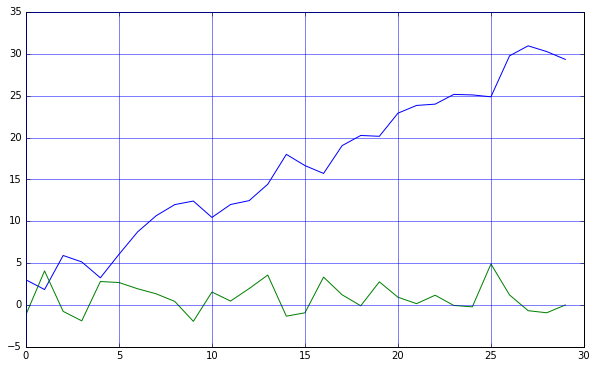

In [148]:
sinCurve       = np.sin(datapoints) + noisy_datapoints
sinCurve_grad  = np.gradient(sinCurve, 1)
# finding the second order derivative is unnecessary: sinCurve_twograd = np.gradient(sinCurve_grad)
#instead of using the gradient, I plan to use the difference between each consecutive point. Is it neg or pos?

sinCurve_diff  = np.diff(sinCurve)

sinCurve_diff = np.insert(sinCurve_diff, 29, 0)
print(len(sinCurve_diff))

sinCurve_diff = pd.Series(sinCurve_diff)

sinCurve_pn = np.where((sinCurve_diff < 0), 'r', 'b')

fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(numpy.arange(0,1,0.1))
#ax.set_yticks(numpy.arange(0,1.,0.1))
    
plt.plot(sinCurve)
plt.plot(sinCurve_diff)

grid(b=True, which='major', color='b', linestyle='-')
grid(b=True, which='minor', color='r', linestyle='--')

<h4>And now for the colouring function in pseudocode:</h4>
<p><code>for eachPoint <i>between</i> Point_2 <i>and<i> Point_n:</code></p>
<p><code>    if [eachPoint - 1] > eachPoint:</code></p>
<p><code>        turn eachPoint red</code></p>
<p><code>    elif [eachPoint - 1] < eachPoint:</code></p>
<p><code>        turn eachPoint blue</code></p>
<p><code>    else:</code></p>
<p><code>        turn eachPoint grey</code></p>

In [149]:
sinCurveDF = pd.DataFrame({'sinCurve': sinCurve, 'diff':sinCurve_diff, 'pn':sinCurve_pn})

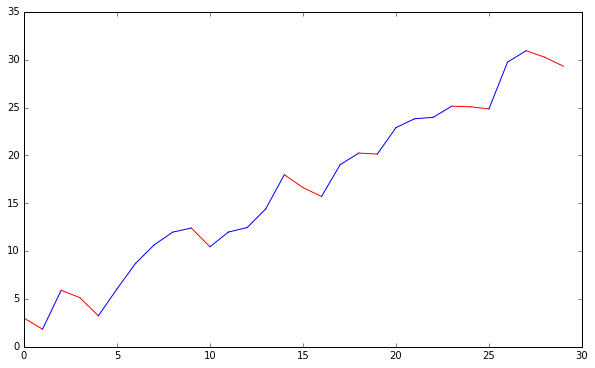

In [150]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
for s in range(0, len(sinCurveDF.sinCurve) - 1):
    x=(sinCurveDF.index[s], sinCurveDF.index[s + 1])
    y=(sinCurveDF.sinCurve[s], sinCurveDF.sinCurve[s + 1])
    ax.plot(x, y, c=sinCurveDF.pn[s])
plt.show()